In [2]:
# import relevant modules

import csv
import pandas as pd
import os
import numpy as np
from pathlib import Path
import json
import matplotlib.pyplot as plt
import json
from sklearn import datasets, linear_model

In [19]:
plt.style.use('dark_background')

            avgcpu   node_count  elapsed_time
count  1242.000000  1242.000000   1242.000000
mean     59.077921    14.782609   1552.371361
std      24.925924    11.512503   1656.600566
min       0.190476     4.000000      5.644642
25%      43.197765     6.000000    463.889500
50%      64.034940    10.000000    892.353500
75%      81.535303    20.000000   2028.143000
max      92.944448    48.000000   7200.530614
      avgcpu  node_count cluster_type workload engine_type data_size  \
0  40.520195          10   c4.2xlarge     join       spark   bigdata   
1  27.190990          10   c4.2xlarge     join       spark      huge   
2  87.612579          10   c4.2xlarge   kmeans    spark1.5   bigdata   
3  82.041642          10   c4.2xlarge   kmeans    spark1.5      huge   
4   3.758062          10   c4.2xlarge       lr       spark   bigdata   

   elapsed_time                                     name  
0    305.064000       10_c4.2xlarge_join_spark_bigdata_1  
1    365.106000          10_c4.2xla

<AxesSubplot: xlabel='node_count'>

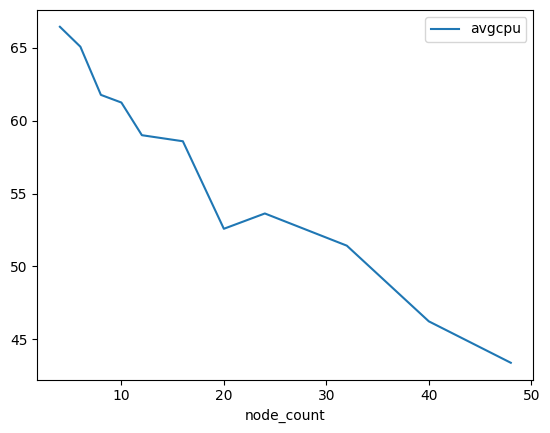

In [4]:
#check that average utilisation file exists and that the data makes sense 

path = "../processed/scout/average_utils/averages.csv"

averagesdf=pd.read_csv(path)
print(averagesdf.describe())
print(averagesdf.head())

averagesdf.groupby('node_count')['avgcpu'].mean(numeric_only=True).plot(legend=True)

node counts None
91.75634757053498
88.07336478603457
85.81790801790802
84.82711049178823
84.02091929203173


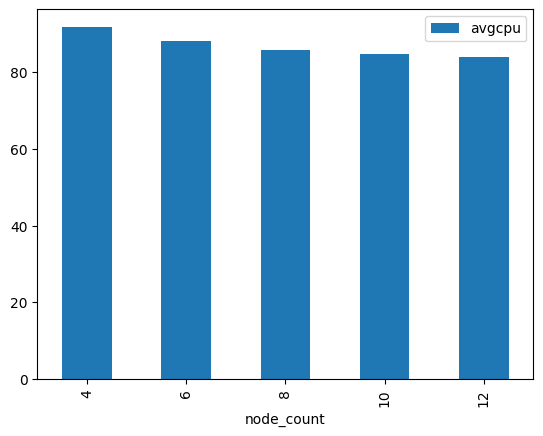

In [11]:
# check average utilisation by node count and job works

node_workload = averagesdf.groupby(['node_count','workload'])['avgcpu'].mean(numeric_only=True)

instancetypes=averagesdf["cluster_type"].unique()
nodecounts=averagesdf["node_count"].unique().sort()
# used to filter by job and cluster type
_filter = (averagesdf['workload']=='kmeans')& (averagesdf['cluster_type'] == 'c4.2xlarge')   
result = averagesdf[_filter].groupby(['node_count'])['avgcpu'].mean(numeric_only=True)
result.plot(kind='bar', legend=True)
x=nodecounts
print("node counts", nodecounts)
for util_result in result:
    print(util_result)


<AxesSubplot: xlabel='workload'>

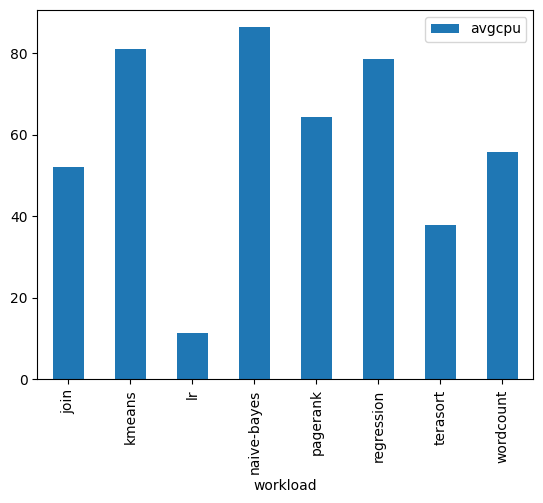

In [12]:
# graph of average utilisation by workload
averagesdf.groupby('workload')['avgcpu'].mean(numeric_only=True).plot(kind='bar',legend=True)

<AxesSubplot: xlabel='cluster_type'>

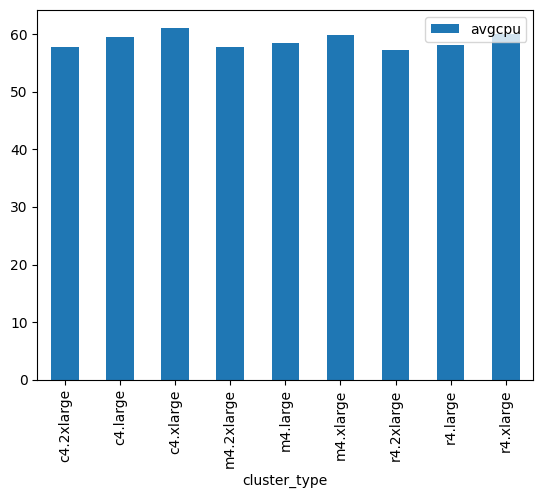

In [13]:
#look into average utilisation with different jobs as well as cluster type 
averagesdf.groupby('cluster_type')['avgcpu'].mean(numeric_only=True).plot(kind='bar',legend=True)

<AxesSubplot: xlabel='data_size'>

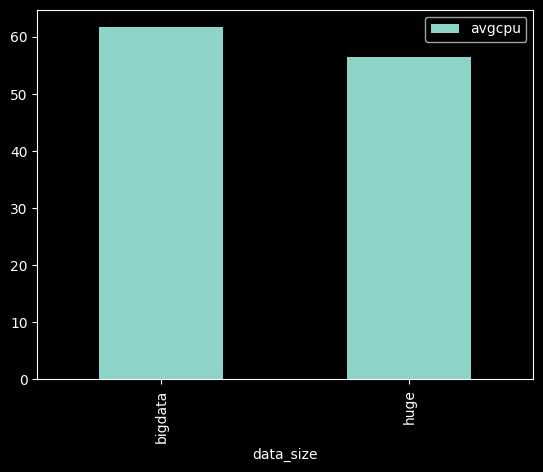

In [98]:
averagesdf.groupby('data_size')['avgcpu'].mean(numeric_only=True).plot(kind='bar',legend=True)

<AxesSubplot: xlabel='engine_type'>

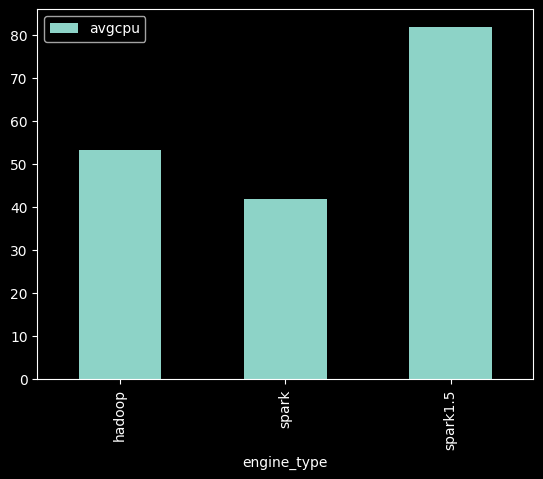

In [99]:
averagesdf.groupby('engine_type')['avgcpu'].mean(numeric_only=True).plot(kind='bar',legend=True)

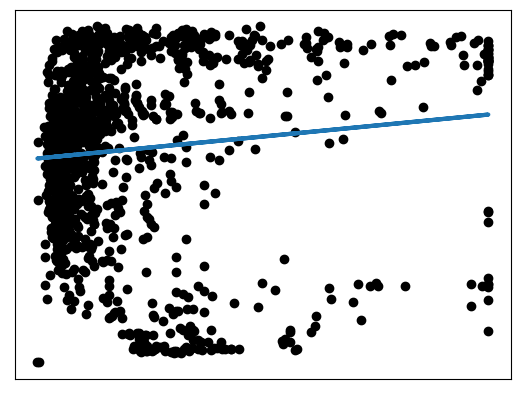

In [16]:
# attempt to find relationship between time taken and CPU utilisation 
x,y=averagesdf['elapsed_time'],averagesdf['avgcpu']
vals=1242
x = x.values.reshape(1242, 1)
y = y.values.reshape(1242, 1)
regr = linear_model.LinearRegression()
regr.fit(x,y)
plt.scatter(x, y,  color='black')
plt.plot(x, regr.predict(x), linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

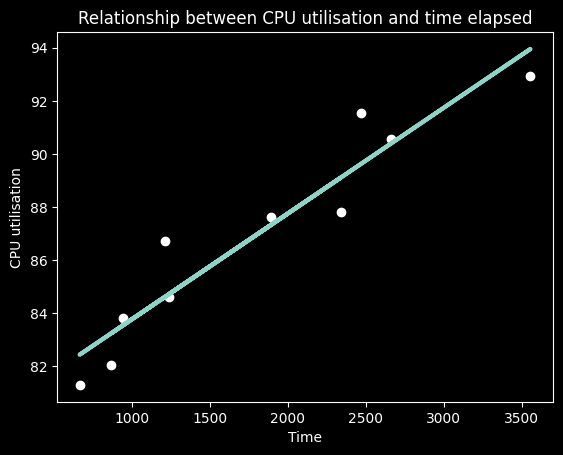

In [38]:
_filter = (averagesdf['workload']=='kmeans') & (averagesdf['cluster_type'] == 'c4.2xlarge')   
result = averagesdf[_filter]
x,y=result['elapsed_time'],result['avgcpu']
x = x.values.reshape(x.shape[0], 1)
y = y.values.reshape(y.shape[0], 1)
regr = linear_model.LinearRegression()
regr.fit(x,y)
plt.scatter(x, y,  color='white')
plt.plot(x, regr.predict(x), linewidth=3)
plt.title("Relationship between CPU utilisation and time elapsed")
plt.xlabel("Time")
plt.ylabel("CPU utilisation")
plt.show()


In [40]:
'''Script creates CSV storing average node CPU utilisation of each run'''

path = "../raw/osr_multiple_nodes/"
counter = 0
fulldfs = []
folders=os.listdir(path)
nooffolders=len(folders)
for x in folders:
    counter += 1
    #print(x)

    subpath = path+x
    nodedfs = []
    for y in os.listdir(subpath):
        if y == "report.json":
            with open(subpath+'/'+y,'r') as f:
                report = json.load(f)
                elapsed_time=report['elapsed_time']
        else:
            df = pd.read_csv(subpath+"/"+y)
            d = {'avgcpu': [df["cpu.%usr"].mean()]}
            avgdf = pd.DataFrame(data=d)
            nodedfs.append(avgdf)
    alldfs = pd.concat(nodedfs)
    avg = alldfs.groupby(level=0).mean(numeric_only=True)

    node_count, instance_type, job_input, engine_type, data_size, _ = x.split(
        "_")
    avg = avg.assign(node_count=[node_count], instance_type=[instance_type], job_input=[
                     job_input], engine_type=[engine_type], data_size=[data_size],elapsed_time=[elapsed_time],name=[x]) 
    fulldfs.append(avg)
    print(f'completed {counter}/{nooffolders}')
    
    #if counter == 10:
    #    break
all = pd.concat(fulldfs)
dfpath = Path(f"../processed/scout/average_utils/averages.csv")
all.to_csv(dfpath, index=False)


completed 1/1242
completed 2/1242
completed 3/1242
completed 4/1242
completed 5/1242
completed 6/1242
completed 7/1242
completed 8/1242
completed 9/1242
completed 10/1242
completed 11/1242
completed 12/1242
completed 13/1242
completed 14/1242
completed 15/1242
completed 16/1242
completed 17/1242
completed 18/1242
completed 19/1242
completed 20/1242
completed 21/1242
completed 22/1242
completed 23/1242
completed 24/1242
completed 25/1242
completed 26/1242
completed 27/1242
completed 28/1242
completed 29/1242
completed 30/1242
completed 31/1242
completed 32/1242
completed 33/1242
completed 34/1242
completed 35/1242
completed 36/1242
completed 37/1242
completed 38/1242
completed 39/1242
completed 40/1242
completed 41/1242
completed 42/1242
completed 43/1242
completed 44/1242
completed 45/1242
completed 46/1242
completed 47/1242
completed 48/1242
completed 49/1242
completed 50/1242
completed 51/1242
completed 52/1242
completed 53/1242
completed 54/1242
completed 55/1242
completed 56/1242
c

In [10]:
'''Old Script for average utils for single node data'''

path = "../raw/osr_single_node/"
counter = 0

# loop through unprocessed files
for x in os.listdir(path):
    counter += 1

    subpath = path+x+"/sar.csv"
    df = pd.read_csv(subpath)
    # compute averages across file and store
    d = {'name': [x], 'avgcpu': [df["cpu.%usr"].mean()], 'avgmem': [
        df["memory.%memused"].mean()], 'avgdisk': [df["disk.%util"].mean()]}
    avgdf = pd.DataFrame(data=d)

    dfpath = Path(f"../processed/scout/average_utils/{x}.csv")
    avgdf.to_csv(dfpath, index=False)
    if counter == 6:
        break


In [13]:
'''Old Script based on single node data'''
path = "../raw/osr_single_node/"
counter = 0

# loop through unprocessed files
for x in os.listdir(path):
    counter += 1

    subpath = path+x+"/sar.csv"
    df = pd.read_csv(subpath)
    # store 5s utilisation data
    d = {'cpu': df["cpu.%usr"], 'mem': df["memory.%memused"],
         'disk': df["disk.%util"]}
    avgdf = pd.DataFrame(data=d)
    dfpath = Path(f"../processed/scout/slim_data/{x}.csv")
    avgdf.to_csv(dfpath, index=False)
    if counter == 6:
        break


In [14]:
'''Old Script based on processed single node data'''

# loop through slimmed down files
path = "../processed/scout/slim_data/"
counter = 0


dfs = []

for x in os.listdir(path):
    fullpath = path+x
    if os.path.isfile(fullpath):
        counter += 1
        df = pd.read_csv(fullpath)
        dfs.append(df)

        # store combined csv and start again
        if x[-5] == '3':
            alldfs = pd.concat(dfs)
            dfpath = Path(
                f"../processed/scout/slim_data/runs_merged/{x[:-6]}.csv")
            alldfs.to_csv(dfpath, index=False)
            dfs = []
            continue

        if counter == 6:
            break
